# P1 Basis Functions for 16 x 16 Discrete Cosine Transform (DCT)

The discrete cosine transform (DCT) is used in the space-frequency analysis of images to represent an image based on its amplitude response to a set of spatial frequencies. These different spatial frequencies are the basis functions of the transform. Rather than representing an image as an array of pixel intensity values, we can consider an image to be an array of amplitude response coefficients where each coefficient corresponds to the response of the input image to that particular spatial frequency. 

In short, an image can be represented as:

$$I = w * S$$
Where $I$, the image, is a function of the coefficients (amplitude responses), $w$, mutliplied by the respective spatial frequency $S$ or basis function of the transformation. In this notebook, we will look at the basis functions for a 16 x 16 discrete fourier transformation.

In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import convolve

import cv2

# Calculate the Basis Functions for an M x N Matrix

In [2]:
def basis_function(M, N):    
    basis = np.zeros((M, N, M*N))
    i = 0 
    for p in range(M):
        for q in range(N):
            
            if p == 0:
                ap = 1 / np.sqrt(M)
            else:
                ap = np.sqrt(2 / M)

            if q == 0:
                aq = 1 / np.sqrt(N)
            else:
                aq = np.sqrt(2 / N)
                
            for m in range(M):
                for n in range(N):
                    one = np.cos((np.pi * (2 * m + 1) * p) / (2 * M))
                    two = np.cos((np.pi * (2 * n + 1) * q) / (2 * N))
            
                    result = ap * aq * one * two
                
                    basis[n, m, i] = result
                    
            i += 1
    return basis
    

# Compute for 16 x 16 Matrix

In [3]:
basis_functions = basis_function(16, 16)

# Visualize Basis Functions for 16 x 16 DCT

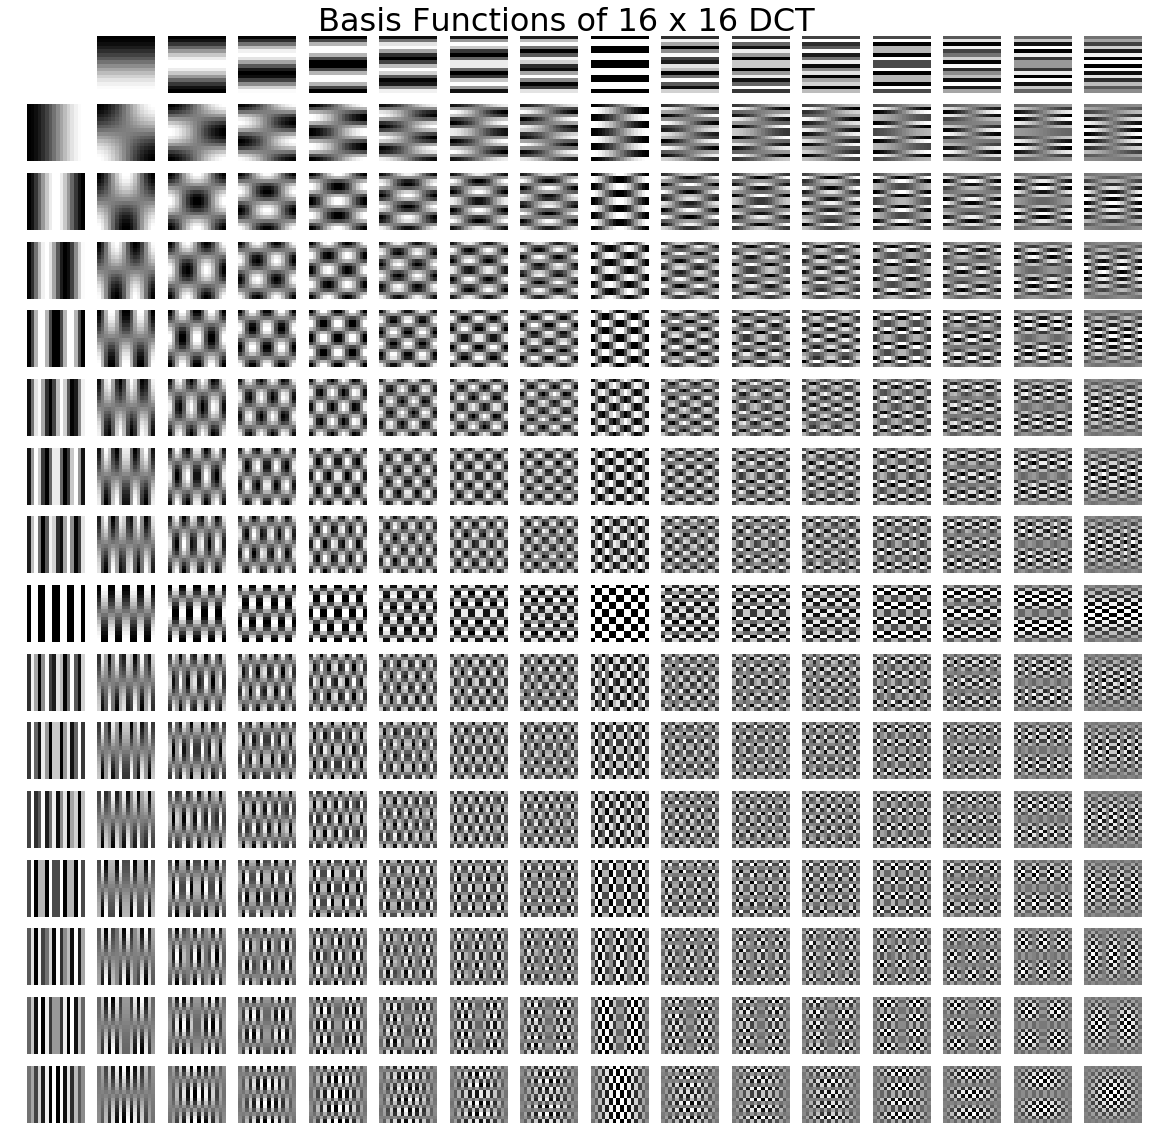

In [4]:
plt.figure(figsize=(20, 20))
for i in range(0, 256):
    plt.subplot(16, 16, i + 1)
    image = basis_functions[:, :, i]
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    
plt.suptitle('Basis Functions of 16 x 16 DCT', y = 0.9, size = 32)  
plt.show();

# Response of Image to Each Basis Function

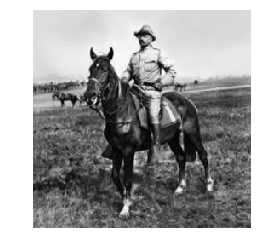

In [5]:
image = cv2.imread('img/ex.jpg')
image = cv2.resize(image, (256, 256))[:, :, 2]
plt.imshow(image, cmap='gray'); plt.axis('off');

# Convolve Each Basis Function with the Image and find the total response

In [6]:
c = np.zeros((271, 271, 256))
total_response = []
for i in range(256):
    result = convolve(image, basis_functions[:, :, i])
    c[:, :, i] = result
    total_response.append(np.sum(result))

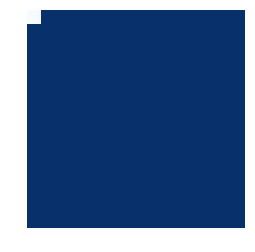

In [7]:
total_array = np.array(total_response / np.sum(total_response)).reshape((16, 16))
plt.imshow((total_array), cmap = plt.cm.Blues_r);
plt.axis('off');

# Result of Several of the Convolutions

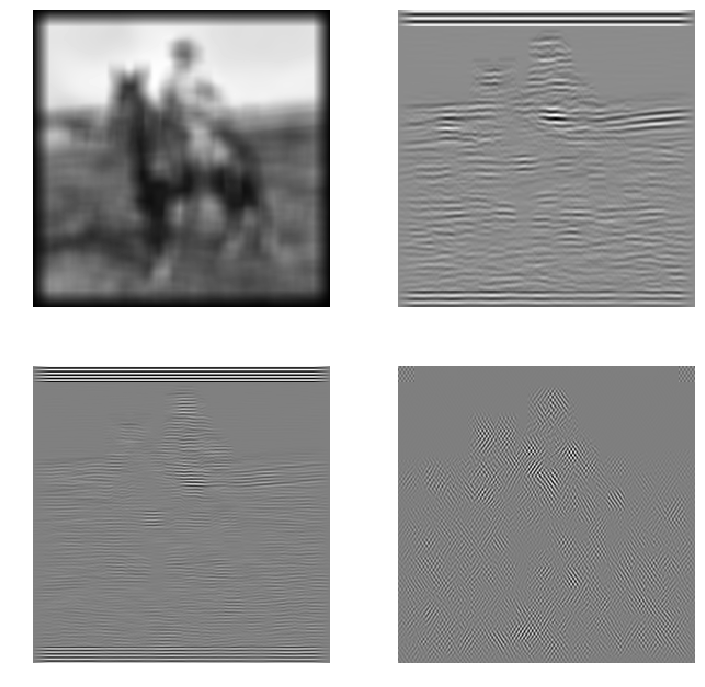

In [8]:
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.imshow(c[:, :, 0], cmap = 'gray'); plt.axis('off');

plt.subplot(2, 2, 2)
plt.imshow(c[:, :, 5], cmap = 'gray'); plt.axis('off');

plt.subplot(2, 2, 3)
plt.imshow(c[:, :, 10], cmap = 'gray'); plt.axis('off');

plt.subplot(2, 2, 4)
plt.imshow(c[:, :, 150], cmap = 'gray'); plt.axis('off');

I'm not sure if I implemented this correctly, but I think what we are seeing is that the response to the DC component (0 spatial frequency) overwhelms all of the other responses. If this is right, then we could reduce the information needed to store the image by finding the image response to each basis function, and removing most of the high frequency responses because they do not contain much information. 

# Conclusions 

In this notebook we examined the 256 basis functions for a 16 x 16 discrete cosine transformation. The discrete cosine transformation allows us to represent an image by spatial frequency responses rather than as pixel intensity values.